## Final project (30 credits + extra credits)

- You are required to finish **both of these two projects**.


- Please submit the codes as well as the results. **Submission in .ipynb is preferred format** for the grading purpose. If you are using jupyter notebook, show the running result right after each cell. Of course you can use other editors and show the results. 


- For any submission that only contains codes without showing the required results, it will be lose 2 credits.


- **Due date: May 18, 11:59 pm**. Sumission of final project before the end of **May 10 earns 1 extra credits**. Submission between May 18 and May 20 will lose 5 points. No submission will be accepted after May 20 because this is the last day of the semester. If you anticipate delay, must inform the instructor 3 days ahead of time. 

In [1]:
import pandas as pd
import io
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
tf.__version__
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from skimage.color import gray2rgb
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


### Project 1 (10 credits)

We made coronavirus distribution map before. We will make more graphs this time using the data "time_series_covid19_confirmed_global.csv" and "time_series_covid19_deaths_global.csv" from the following link: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series . You can go to the parent directory https://github.com/CSSEGISandData/COVID-19 to download all the files and find the two aforementioned csv files. Please use the up-to-date data instead of the one you downloaded weeks ago. 


We want to visualize the trend of some countries with a lot of confirmed cases. Let's narrow down to these **8 countries**: Canada, China, France, Germany, Italy, Spain, United Kingdom, and US.

**Graph 1 (5 credits):** x axis is "Days since the first 100 cases were reported", and y axis is "confirmed cases". You will use data from "time_series_covid19_confirmed_global.csv". For each of 8 countries, find the date that the confirmed cases >100 to start, and take this date as day 1 on the graph you are making. Plot the data from day 1 to the last date on the csv file. 

For example, the first date of >100 confirmed cases in the US is 3/3/2020. Then you plot the case number from 3/3/2020 to the last date on the csv file. *Note:* Each country will have different dates on the graph. That means the range of x won't be the same. **Put legend on the graph, and use markers together with line for each curve on the graph**. This link https://matplotlib.org/tutorials/introductory/pyplot.html is helpful. <br />
*Hint*: To have multiple curves in one graph, it is quite simple to do by matplotlib. For example, <br />
plt.plot(x1, y1) <br />
plt.plot(x2, y2) <br />
.. <br />
plt.imshow

In [2]:
urlc = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
s=requests.get(urlc).content
confirmed=pd.read_csv(io.StringIO(s.decode('utf-8')))
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524


['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

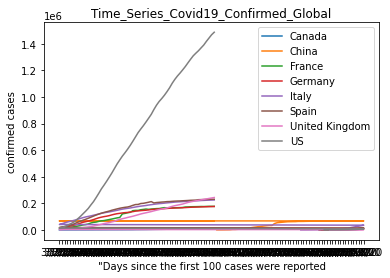

In [3]:
#canada
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[35,i])
print(name) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='Canada')

#china
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[62,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='China')

#France
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[116,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='France')

#Germany
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[120,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='Germany')

#Italy
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[137,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='Italy')

#Spain
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[201,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='Spain')

#UK
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[223,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='United Kingdom')

#US
name = []
canada = []
index = 0
for col in confirmed.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(confirmed.iloc[225,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j > 100:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
plt.plot(name, canada, label='US')


plt.xlabel('"Days since the first 100 cases were reported')
plt.ylabel('confirmed cases')
plt.legend()
plt.title('Time_Series_Covid19_Confirmed_Global')
plt.show()

**Graph 2 (5 credits):** both data for x axis and y axis are from "time_series_covid19_deaths_global.csv". Again, plot 8 curves for 8 countries in one graph. In the graph, x axis data is "Total death cases", and y axis data is "5-day new death cases". Try to start counting from the dates of more than 10 cases. How do you reorganize and get the required data? Let's take US data as an example. The first x axis data point is 11 on 3/4/20, and the corresponding y axis data point should the case number on 3/4/20 minus the case number on 2/29/20. The second x axis data point is 22 on 3/9/30, and the y axis data point should the case number on 3/9/20 minus the case number on 3/4/20, and so on till the end (note: the last few days can be ignored since the data of every 5 days are taken). The final graph could look like the below figure. You **don't** need to have the such sophisticated labels as this example.

![image.png](attachment:image.png)

In [4]:
urld = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
s=requests.get(urld).content
deaths=pd.read_csv(io.StringIO(s.decode('utf-8')))
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,5,5,5,5,5,6,7,7,7,7
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,4,5,5,7,7,8,9,10,12,12,15,18,20
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,5,8,12,12,20,20,21,21,23,29,33,36,39


['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

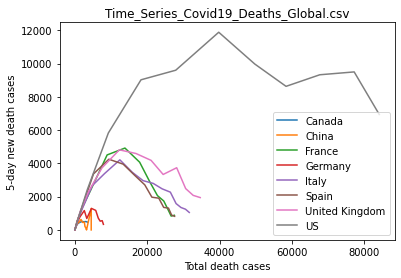

In [5]:
#canada
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[44,i]) 
print(name)
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='Canada')

#China
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[62,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='China')

#France
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[116,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='France')

#Germany
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[120,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='Germany')

#Italy
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[137,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='Italy')

#Spain
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[201,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='Spain')

#UK
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[223,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='United Kingdom')

#US
name = []
canada = []
index = 0
for col in deaths.columns:
  name.append(col)
for i in range(len(name)):
  canada.append(deaths.iloc[225,i]) 
print(canada)
for i in range(4, len(canada)):
  conf = canada[i]
  j = int(conf)
  if j >= 10:
    index = canada.index(j)
    break
name = name[index:len(name)]
canada = canada[index:len(canada)]
name = name[0::5]
canada = canada[0::5]
d_rate = [canada[0]]
for i in range(0, len(canada)-1):
  d_rate.append(canada[i+1] - canada[i])
plt.plot(canada, d_rate, label='US')


plt.xlabel('Total death cases')
plt.ylabel('5-day new death cases')
plt.legend()
plt.title('Time_Series_Covid19_Deaths_Global.csv')
plt.show()

### Project 2 (20 credits + 3 extra credits)

**Classification of facial expression**

We can tell the facial expression easily by looking at the face of a person. Now let's train the computer to recognize facial expression. Two csv datasets are provided. **"facial_expression.csv"** is used for **training** machine learning models, and **"test.csv"** is used for **testing** the model on new facial expression images. The faces have been centered in each images. There are totally 6 categories of faces, **0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral**. These datasets was modified to remove one expression that has few images. Your task is to predict the emotions following the description below.

**Explanation of the datasets:**

1. Each of "facial_expression.csv" and "test.csv" contains two columns, "emotion" and "pixels". "emotion" column has numbers corresponding to emotions: 0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral. The "pixels" column contains strings that are flattened from **48 pixels by 48 pixels** grey-scale images. Each string is space separated. 


2. In order to save your half-day time of converting data format, I also provide "np_training_data.npy" that converts the "pixels" column of "facial_expression.csv" into a numpy array from many strings. You can use this numpy array to visualize individual images, and also plug it into machine learning models (of course still need more format conversion). However, since "test.csv" is relative small size, you will need to convert it into a numpy array first before machine learning. 


3. The training set "facial_expression.csv" consists of 26,859 samples. The test dataset "test.csv" contains another 1044 samples.


4. In general, normalized data work better for all the machine learning models. It is better you normalize them.


5. This is a real-world application, and human facial expression changes are trivial compared with distinguishing a mouse from a car. So don't feel terrible if you can not achieve more than 50% accuracy. 

6. Online notebook runs faster than your computer: https://colab.research.google.com/notebooks/welcome.ipynb#scrollTo=ufxBm1yRnruN

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
cd '/content/gdrive/My Drive/BME 361/Ahamed_Arif_BME361_FInal_Project'

/content/gdrive/My Drive/BME 361/Ahamed_Arif_BME361_FInal_Project


**Question 2 (7 credits)**: Use random forest, svm or knn (choose one) to train all the 26,859 samples in "facial_expression.csv", and predict the emotions of "test.csv" data. Please present the results of (1) accuracy score of prediction ( the accuracy score can be obtained by accuracy_score(y_test, y_pred) in week 12 machine learning code), (2) visualization of confusion matrix by sns plotting, and (3) show >=12 samples like the following figure where each sample corresponds to a grey scale image, and the title of the images contains true emotion and the predicted emotion (See Week 13-14. Deep learning. The digits in these handwritten images have nothing to do with emotions 0 to 5 in this question. The plotted images in this question should be human faces). You are free to plot any failed and successful predictions.![image.png](attachment:image.png)

In [0]:
# To help you start quickly. 'np_training_data.npy' can be downloaded from Blackboard. This data was extracted from the second column of'facial_expression.csv'
# You need to figure out X_test and y_test by yourself.
from sklearn import svm
import pandas as pd
import numpy as np
X_train = np.load('np_training_data.npy')

df=pd.read_csv('facial_expression.csv')
emotions=df.emotion
y_train = np.array(emotions)

In [9]:
train = pd.read_csv('facial_expression.csv')
trainlabel = train.emotion.to_numpy()
traindata = []
trainflatten = []
for i in range(0, 26859):
    traindata.append(list(train.pixels[i].split(" ")))
traindata = np.array(traindata)
traindata = traindata.reshape((26859, 48, 48))
traindata = traindata.astype('float64')
trainnorm = traindata/255.0
for img in trainnorm:
    trainflatten.append(img.flatten())
trainflatten = np.array(trainflatten)
print(trainnorm.shape)
print(trainlabel.shape)

test = pd.read_csv('test.csv')
testlabel = test.emotion.to_numpy()
testdata = []
testflatten = []
for i in range(0, 1044):
    testdata.append(list(test.pixels[i].split(" ")))
testdata = np.array(testdata)
testdata = testdata.reshape((1044, 48, 48))
testdata = testdata.astype('float64')
testnorm = testdata/255.0
for img in testnorm:
    testflatten.append(img.flatten())
testflatten = np.array(testflatten)
print(testnorm.shape)
print(testlabel.shape)

(26859, 48, 48)
(26859,)
(1044, 48, 48)
(1044,)


In [10]:
clf = svm.SVC()
clf.fit(trainflatten, trainlabel)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The accuracy of the the SVM model is:  61.206896551724135 %


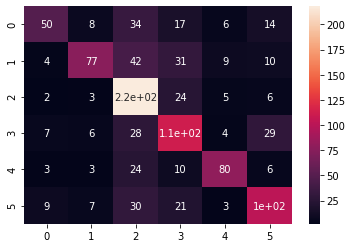

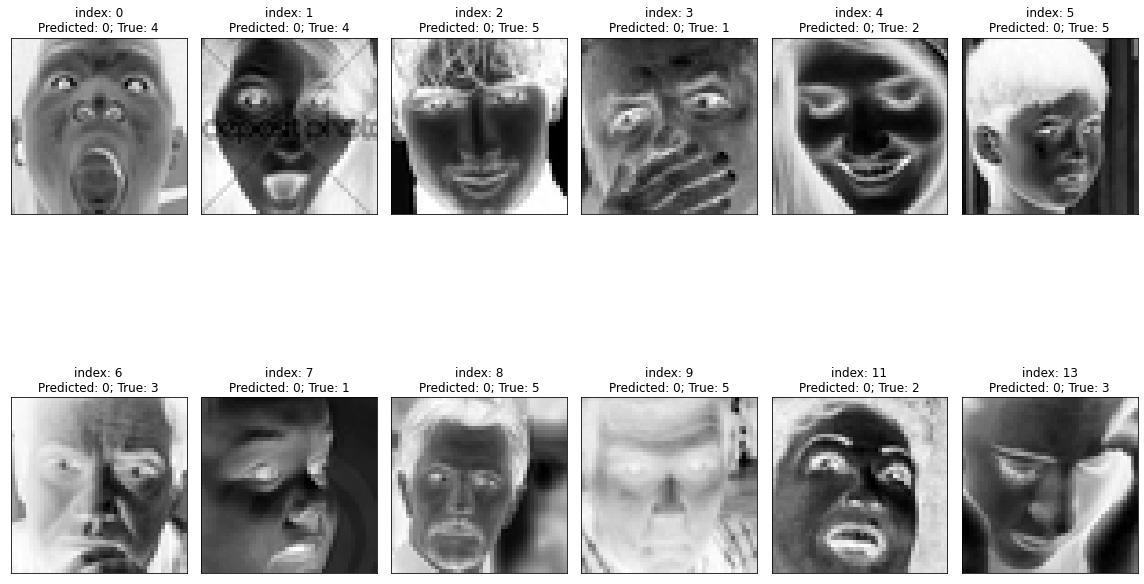

In [11]:
svmpredict = clf.predict(testflatten)
svmacc = accuracy_score(svmpredict, testlabel)
images = testdata.reshape((1044, 48, 48))
images = images.astype('float64')
incorrect_predictions = []

print('The accuracy of the the SVM model is: ', float(svmacc) * 100, '%')
cnf = confusion_matrix(testlabel, svmpredict)
sns.heatmap(cnf, annot=True)

for i, (pred, expect) in enumerate(zip(svmpredict, testlabel)):
  predicted, expected = np.argmax(pred), expect
  if predicted != expected: 
    incorrect_predictions.append((i, images[i], predicted, expected))

figure, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) 
  axes.set_yticks([]) 
  axes.set_title(f'index: {index}\nPredicted: {predicted}; True: {expected}')
plt.tight_layout()

**Question 3 (8 credits)**: Construct a convolutional neural network (CNN) model with at least 2 convolutional layers. Train your own CNN model for prediction on testing data. The training data and testing data should be the same as Question 2. Present the result (1), (2) and (3) as described in Question 2. You can use model.evaluate to get the accuracy score on testing data.

- You need to transform the training data and testing data to fit your own CNN model.


- Adjust parameters to achieve higher accuracy. For example, epoch number, filter number for conv2D, number of layers, add Dropout layer and percentage, batch_size, optimizer, etc. 


- If you experience no change of val_loss and val_acc over a few epochs at the beginning, most likely some parameters were not optimal.


- Running can take a few hours, depending on the quality of your computer. Good model is normally trained between 10 and 30 epochs. So must make good judgement on when to stop the non-promising program. You can try online colab to run the program. If your program takes >1 h to run on colab and don't see val_acc is increasing significantly, the setting of the model could be wrong. 


- **>40%  val_acc is required. You need to show the history of val_acc.** **Also note val_acc for training is NOT necessarily the same as accuracy score for prediction using testing data.**

In [12]:
cnn = Sequential()
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(units=12, activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(units=6, activation='sigmoid',))
cnn.summary()
cnn.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                9

In [14]:
trainnormrs = traindata.reshape(26859, 48, 48, 1)
trainnormrs = trainnormrs / 255
testnorms = testdata.reshape(1044, 48, 48, 1)
testnorms = testnorms /255
trainlabels = to_categorical(trainlabel)
testlabels = to_categorical(testlabel)
print(trainnormrs.shape)
print(trainlabels.shape)
print(testnorms.shape)
print(testlabels.shape)

(26859, 48, 48, 1)
(26859, 6)
(1044, 48, 48, 1)
(1044, 6)


In [15]:
cnn.fit(trainnormrs, trainlabels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
168/168 [==============================] - 115s 685ms/step - loss: 1.7397 - accuracy: 0.2576 - val_loss: 1.6759 - val_accuracy: 0.2843
Epoch 2/20
168/168 [==============================] - 115s 684ms/step - loss: 1.6534 - accuracy: 0.3211 - val_loss: 1.6128 - val_accuracy: 0.3362
Epoch 3/20
168/168 [==============================] - 117s 696ms/step - loss: 1.5944 - accuracy: 0.3601 - val_loss: 1.5367 - val_accuracy: 0.4090
Epoch 4/20
168/168 [==============================] - 115s 686ms/step - loss: 1.5448 - accuracy: 0.3809 - val_loss: 1.4753 - val_accuracy: 0.4267
Epoch 5/20
168/168 [==============================] - 116s 688ms/step - loss: 1.4975 - accuracy: 0.4023 - val_loss: 1.4519 - val_accuracy: 0.4313
Epoch 6/20
168/168 [==============================] - 117s 697ms/step - loss: 1.4637 - accuracy: 0.4161 - val_loss: 1.4172 - val_accuracy: 0.4507
Epoch 7/20
168/168 [==============================] - 115s 686ms/step - loss: 1.4322 - accuracy: 0.4258 - val_loss: 1.3818 -

33/33 [==============================] - 1s 42ms/step - loss: 1.1913 - accuracy: 0.5565
The accuracy for the cnn model is:  55.65134286880493


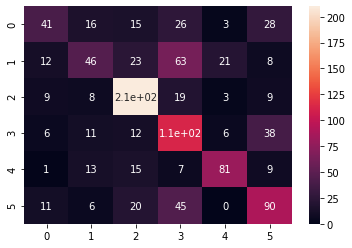

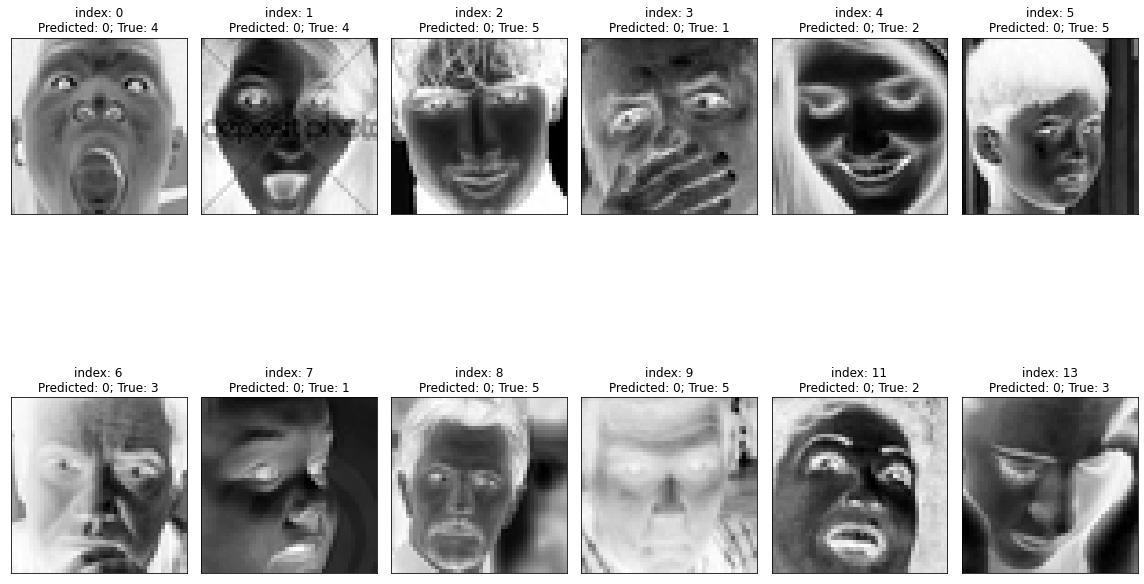

In [16]:
loss, accuracy = cnn.evaluate(testnorms, testlabels)
predictions = cnn.predict(testnorms)
print('The accuracy for the cnn model is: ', accuracy * 100)
predicted_classes = np.argmax(predictions, axis=1)

images = testdata.reshape((1044, 48, 48))
images = images.astype('float64')
incorrect_predictions = []

cnf = confusion_matrix(testlabel, predicted_classes)
sns.heatmap(cnf, annot=True)

for i, (pred, expect) in enumerate(zip(predicted_classes, testlabel)):
  predicted, expected = np.argmax(pred), expect
  if predicted != expected: 
    incorrect_predictions.append((i, images[i], predicted, expected))

figure, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) 
  axes.set_yticks([]) 
  axes.set_title(f'index: {index}\nPredicted: {predicted}; True: {expected}')
plt.tight_layout()

**Question 4 (5 credits)**: Use VGG16 pretrained model on your training data and predict the emotion by the testing data. The training data and testing data should be the same as Question 2 and 3. Present the result (1), (2) and (3) as described in Question 2. You can use model.evaluate to get the accuracy score on testing data.

- again, if val_acc is not changed much over the beginning epochs, most likely the settings are not right and you will lose some points.


- no required val_acc for this model. Mainly because VGG16 was optimized for 224 pixel images in RGB channels.


- running can take long for typical dozens of epochs. So must make good judgement on when to stop the non-promising program. You can try online colab to run the program. If your program takes >1 h to run on colab and don't see val_acc is increasing significantly, the setting of the model could be wrong. 

In [0]:
# some tipis. You need to convert grey scale data to RGB 3 channels. Otherwise VGG16 model will not accept the data format.
# You probably need "pip install scikit-image" to have the function below
from skimage.color import gray2rgb

#X_train_=gray2rgb(X_train)
#X_test_ = gray2rgb(X_test)


In [19]:
trainnormvg = gray2rgb(traindata)
trainnormvg = trainnormvg /255
print(trainnormvg.shape)

testnormvg = gray2rgb(testdata)
testnormvg = testnormvg /255
print(testnormvg.shape)

trainlabelvg = to_categorical(trainlabel)
testlabelvg = to_categorical(testlabel)
print(trainlabelvg.shape)
print(testlabelvg.shape)


(26859, 48, 48, 3)
(1044, 48, 48, 3)
(26859, 6)
(1044, 6)


In [20]:
image_size = [48, 48]
vgg_model = VGG16(input_shape=image_size+[3], weights='imagenet',include_top=False)
x = vgg_model.output
x = Flatten()(x)
x = Dense(4096,activation="relu")(x)
x = Dense(4096,activation="relu")(x)
preds = Dense(6, activation="softmax")(x)
model = Model(vgg_model.input, preds)
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [21]:
model.fit(trainnormvg, trainlabelvg, batch_size=32, validation_split=0.9)

84/84 [==============================] - 881s 10s/step - loss: 2.8158 - accuracy: 0.2201 - val_loss: 1.7589 - val_accuracy: 0.2562


33/33 [==============================] - 24s 740ms/step - loss: 1.7651 - accuracy: 0.2471
The accuracy for the VGG16 model is:  24.712643027305603


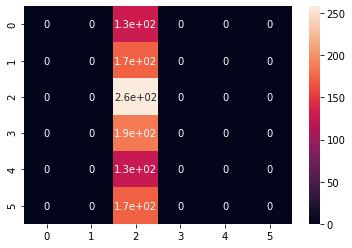

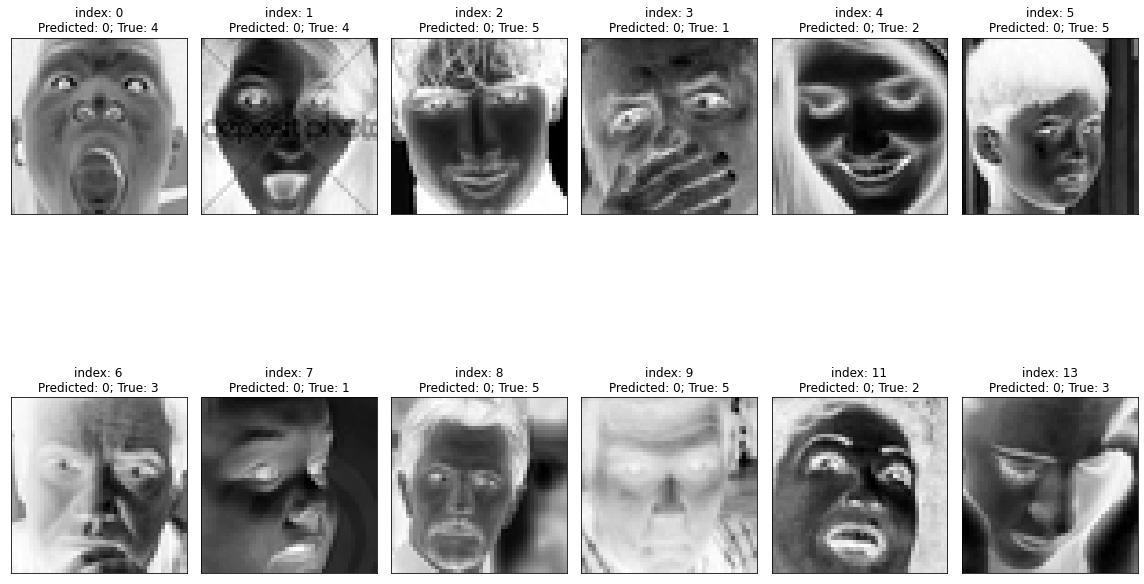

In [22]:
loss, accuracy = model.evaluate(testnormvg, testlabelvg)
predictions = model.predict(testnormvg)
print('The accuracy for the VGG16 model is: ', accuracy * 100)
predicted_classes = np.argmax(predictions, axis=1)

images = testdata.reshape((1044, 48, 48))
images = images.astype('float64')
incorrect_predictions = []

cnf = confusion_matrix(testlabel, predicted_classes)
sns.heatmap(cnf, annot=True)

for i, (pred, expect) in enumerate(zip(predicted_classes, testlabel)):
  predicted, expected = np.argmax(pred), expect
  if predicted != expected: 
    incorrect_predictions.append((i, images[i], predicted, expected))

figure, axes = plt.subplots(nrows=2, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) 
  axes.set_yticks([]) 
  axes.set_title(f'index: {index}\nPredicted: {predicted}; True: {expected}')
plt.tight_layout()

**Question 4 (2 extra credits)**: Use Resnet50 pretrained model on the same training data and predict the results. Only when you can successful run the model with increasing val_acc over 5 epoches you can earn the 2 extra credits. This might be difficult because Resnet50 model is not designed to fit to our training images. However, someone did that so some of you can do it too. 

**Question 5 (1 extra credits)**: Take 2 photos of your own facial expression or grab 2 photos from somewhere, and use any of above trained model to **successfully** predict the **correct** emotions. We practiced before to change the dimension and format of photos. To be consistent with the training data, the final size of photos should be 48 pixels by 48 pixels. 